Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

First we should call some variables from data cleaning process.

In [5]:
%store -r df
df = df

%store -r numeric_columns
numeric_columns= numeric_columns

%store -r cat_columns
cat_columns=cat_columns



Descriptive Analysis

Numerical Data

Now, let's analyze the descriptive statistics for quantitative variuables. In this section we willl find measuerements of central tendency, dispersion and will drwa the distribution plot to comapre it with the normal distribution

In [6]:
def kde_plot(x):
    plt.figure(figsize=(12,3))

    sns.distplot(df[x[0]], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})
    sns.despine(left=True)

    mean=df[x[0]].mean()
    median=df[x[0]].median()

    plt.axvline(mean,color='black',linestyle='dashed')
    plt.axvline(median,color='green',linestyle='solid')
    plt.xlabel('')
    plt.ylabel('')

    return plt.show()

Now we can see the statistical interpretation for quantitative variables:

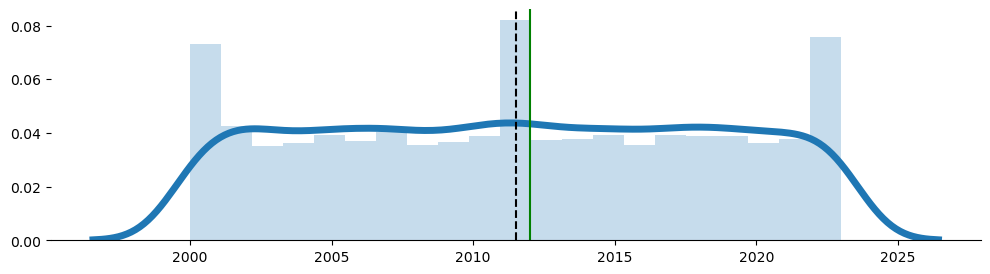

In [7]:
kde_plot([numeric_columns[0]])  #year

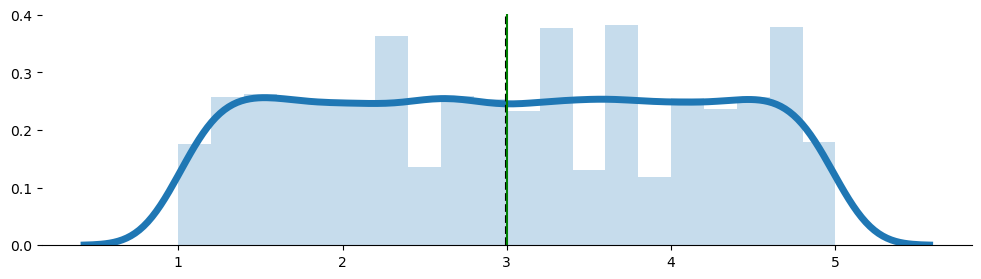

In [8]:
kde_plot([numeric_columns[1]])  #EngineSize

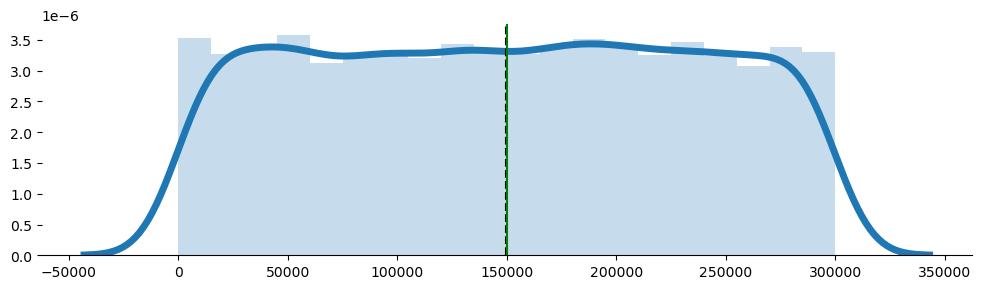

In [9]:
kde_plot([numeric_columns[2]])  #Mileage

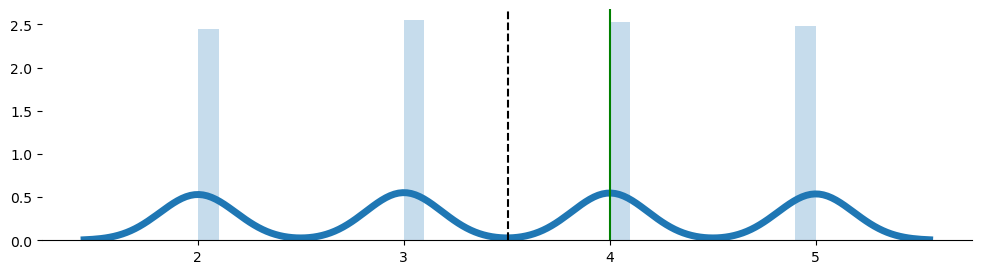

In [10]:
kde_plot([numeric_columns[3]]) #Doors

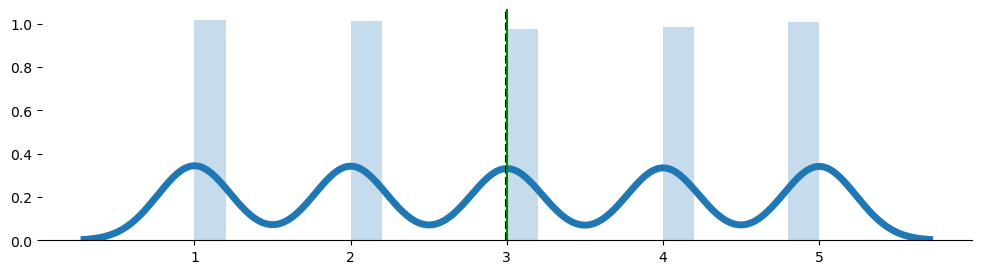

In [11]:
kde_plot([numeric_columns[4]]) #Owners

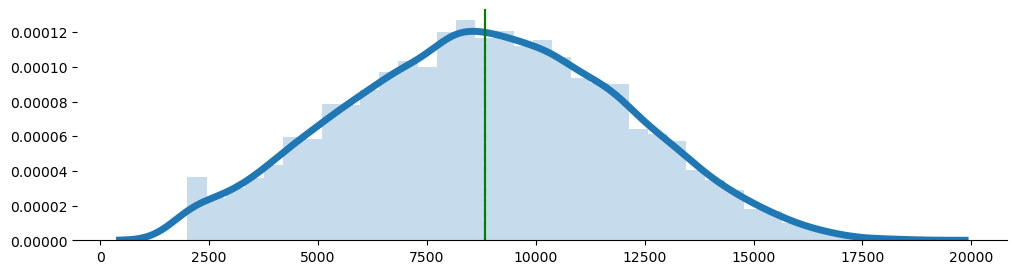

In [12]:
kde_plot([numeric_columns[5]]) #Price



None of the above columns does not need any transformation in later.

Categorical Data

Here we can find the mode of categorical columns to see which category repeated more than rest.

In [13]:
print(cat_columns[0],'->',df[cat_columns[0]].mode()[0])
print(cat_columns[1],'->',df[cat_columns[1]].mode()[0])
print(cat_columns[2],'->',df[cat_columns[2]].mode()[0])
print(cat_columns[3],'->',df[cat_columns[3]].mode()[0])


Brand -> Audi
Model -> Accord
Fuel -> Electric
Transmission -> Manual


Correlataion Anlysis

In this section, I will explore the relationship between various factors and price. Since price is a crucial aspect for each car, it is important to examine variables may be correlated with it. To accomplish this, we will consider two different approches. The first approch involves analyzing the correct numeric variabkes and price using Pearson Correlation. The second approach will asses the correlation between categorical variables and test.

Numerical Data (Pearson)

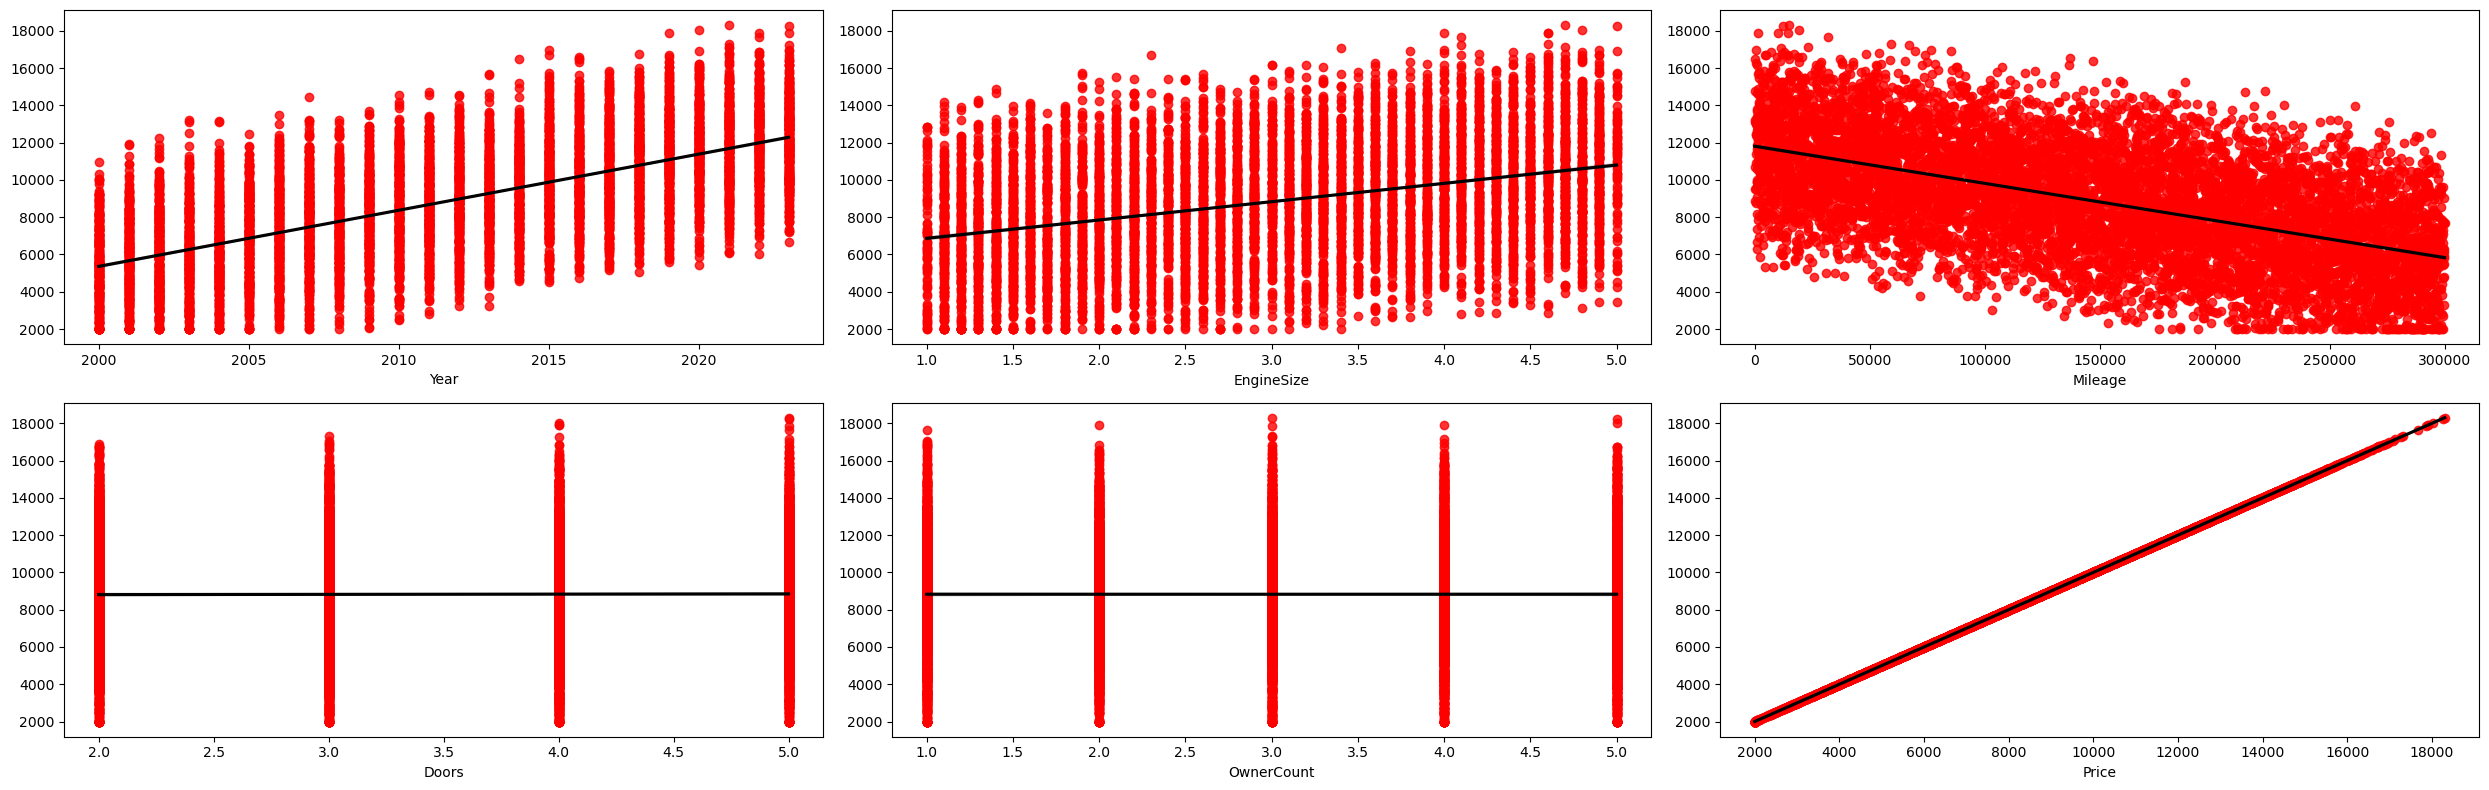

In [14]:
fig,axes=plt.subplots(2,3,figsize=(25,8))
axes=axes.ravel()

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col,
                y='Price',
                data=df,
                ax=axes[i],
                scatter_kws={"color": "red"},
                line_kws={"color": "black"})
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


Newer models have higher price and they have positive relationship.

The cars with bigger Engine size have higher price and they have positive relationship.

The cars with more Mileage have lower price and they have negative relationship.


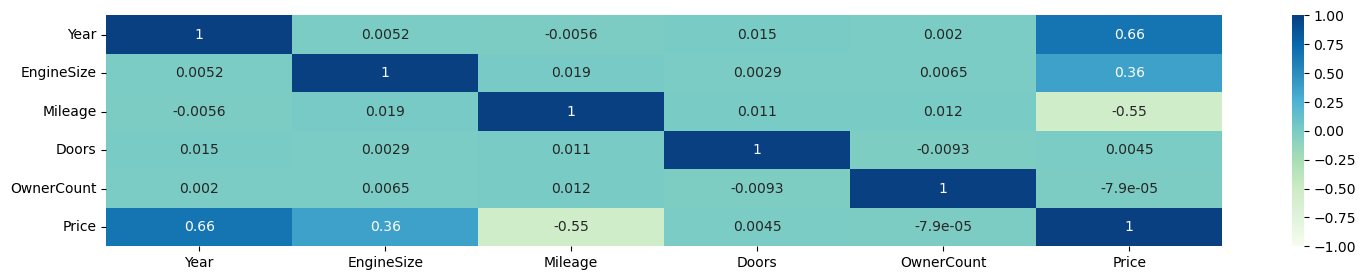

In [15]:
pearson_cor=df[numeric_columns].corr(method='pearson')
plt.figure(figsize=(18,3))

sns.heatmap(pearson_cor,
            vmin=-1,
            vmax=1,
            cmap="GnBu",
            annot=True)
plt.show()

categorical Data (ANOVA)

For categorical variables, the first step is to determine whether a specific categorical variable has an impact on price, meaning we need to assess its significance. To this, we conduct an ANOVA test to compare the differences between means. After identifying the significant variables,we perform pairwise descriptive analysis for categories within the relevantr categorical variable, allowing us to comapre their effects on price.

In [16]:
for i in cat_columns:
    formula='Price ~ {}'.format(i)
    model=ols(formula,data=df).fit()
    anova=sm.stats.anova_lm(model,typ=2)
    p_value=anova.iloc[0,3]

    print('P-value for Price ~ {}: {}'.format(i,p_value))

P-value for Price ~ Brand: 0.1831756268400974
P-value for Price ~ Model: 0.5977964773741584
P-value for Price ~ Fuel: 1.160856964912691e-129
P-value for Price ~ Transmission: 6.731887149610409e-116


According to results, we can come up that:


Fuel and Transmission are significant to explain the price of car, because the p-value is less than 0.05 and we reject null hypothesis.


However, Brand and Model might not bring positive impact on our model.


So, in the next step, we want to see for each label in the above categorical variables, which of them has the most impact on price. Thus, I make s  function to calculate the mean for each lable in every single categorical variable (just the first 5 lables in terms of strength)

In [17]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)

    return mean_by.head(5)

In [19]:
mean_pairwise(cat_columns[0])  #Brand

,Price
Brand,
Chevrolet,9018.451815
Audi,8931.886016
Volkswagen,8901.128019
Mercedes,8892.547554
Kia,8885.963731


In [20]:
mean_pairwise(cat_columns[1]) # Model

,Price
Model,
Tiguan,9146.532423
Impala,9094.073944
Equinox,9093.704453
Q5,9028.094406
Corolla,8995.060377


In [21]:
mean_pairwise(cat_columns[2])  # Fuel

,Price
Fuel,
Electric,10061.022662
Hybrid,9094.456689
Diesel,8091.958829
Petrol,8017.726901


In [22]:
mean_pairwise(cat_columns[3])  # Transmission

,Price
Transmission,
Automatic,9954.639456
Manual,8338.461027
Semi-Automatic,8204.673971
